In [26]:
import numpy as np
import pandas as pd
import mphot

In [38]:
wavelengths = np.arange(0.3, 3, 0.0001)

mirror = pd.read_csv(
    "./optics/Al_reflectivity.csv", index_col=0, header=None, names=["mirror"]
)
lens = pd.read_csv(
    "./optics/fused_silica_transmission.csv", index_col=0, header=None, names=["lens"]
)
# qe = pd.read_csv("./qe/PIRT_1280SciCam_-60_qe.csv", index_col=0, header=None, names=["qe"])
# qe = pd.read_csv("./qe/Sony_IMX461_qe.csv", index_col=0, header=None, names=["qe"])
qe = pd.read_csv("./qe/Andor_iKon-L-936_-60_qe.csv", index_col=0)['-60'].rename("qe")

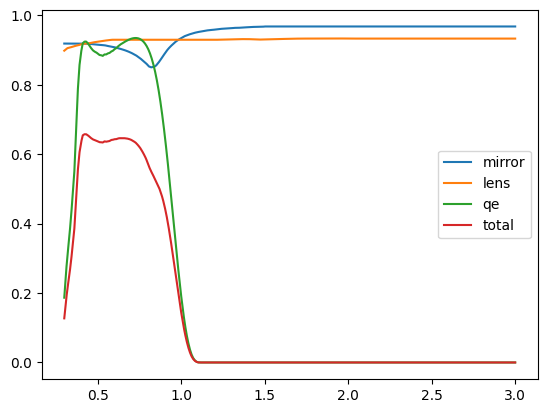

In [39]:
# interpolate the dataframes to the same wavelengths
df = mphot.interpolate_dfs(wavelengths, mirror, lens, qe)

df["total"] = df["mirror"] ** 2 * df["lens"] ** 2 * df["qe"]

df.plot()

df['total'].dropna().to_csv("speculoos_Andor_iKon-L-936_-60.csv", header=False)
